In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
class Gate:
    
    def getNode(self):
        return self.node
    
    def getLeft_wires(self):
        return self.leftwire #list
    
    def getRight_wires(self):
        return self.rightwire #list
    
    def getConcentration_left(self):
        return self.concentration_left  #dictionary
    
    def getConcentration_right(self):
        return self.concentration_right #dictionary
    
    def getInput(self): # case of leftgate = None 
        return self.input 
    
    def getOutput(self): # case of rightgate = None 
        return self.output
    
    def getConcentration_left_th(self): #threshold
        return self.concentration_left_th #dictionary
    
    def getConcentration_right_th(self): #threshold
        return self.concentration_right_th  #dictionary
    
    
    

In [4]:
class Wire:
    def __init__(self, name):
        self.name = name
        self.leftgate = None
        self.rightgate = None
        self.concentration = 0
        
        
    def getLeft_gate(self):
        return self.leftgate
    
    def getRight_gate(self):
        return self.rightgate
    
    def getConcentration(self):
        return self.concentration
    

In [43]:
# ks: reaction rate
# kf: reaction rate
ks = 0.01
kf = 0.05

#make gates

g3 = Gate()
g4 = Gate()
g5 = Gate()
g6 = Gate()



#make wires

w13 = Wire("w13")
w13.leftgate = None
w13.rightgate = g3
w13.concentration = 1 #input
w13.input = 1
w13.output = None
w13.name = "w13"

w34 = Wire("w34")
w34.leftgate = g3
w34.rightgate = g4
w34.concentration = 0.0
w34.input = None
w34.output = None
w34.name = "w34"

w3fuel = Wire("w3fuel")
w3fuel.leftgate = g3
w3fuel.rightgate = None
w3fuel.concentration = 10.0
w3fuel.input = None
w3fuel.output = None
w3fuel.name = "w3fuel"

w46 = Wire("w46")
w46.leftgate = g4
w46.rightgate = None
w46.concentration = 0.0
w46.input = None
w46.output = None
w46.name = "w46"

w25 = Wire("w25")
w25.leftgate = None
w25.rightgate = g5
w25.concentration = 0.3
w25.input = 2
w25.output = None
w25.name = "w25"

w56 = Wire("w56")
w56.leftgate = g5
w56.rightgate = g6
w56.concentration = 0.0
w56.input = None
w56.output = None
w56.name = "w56"

w67 = Wire("w67")
w67.leftgate = g6
w67.rightgate = None
w67.concentration = 0.0
w67.input = None
w67.output = 7
w67.name = "w67"

w68 = Wire("w68")
w68.leftgate = g6
w68.rightgate = None
w68.concentration = 0.0
w68.input = None
w68.output = 8
w68.name = "w68"

#make gates

#g3
g3.node = 3
g3.leftwire = [w13]
g3.rightwire = [w34,w3fuel]
g3.concentration_left = { }
g3.concentration_right = { }
g3.concentration_left_th = { }
g3.concentration_right_th = { }

#g4 
g4.node = 4
g4.leftwire = [w34]
g4.rightwire = [w46]
g4.concentration_left = { }
g4.concentration_right = { }
g4.concentration_left_th = { }
g4.concentration_right_th = { }

#g5
g5.node = 5
g5.leftwire = [w25]
g5.rightwire = [w56]
g5.concentration_left = { }
g5.concentration_right = { }
g5.concentration_left_th = { }
g5.concentration_right_th = { }

#g6
g6.node = 6
g6.leftwire = [w46,w56]
g6.rightwire = [w67, w68]
g6.concentration_left = { }
g6.concentration_right = { }
g6.concentration_left_th = { }
g6.concentration_right_th = { }

 #g3
for i,w in enumerate(g3.leftwire):
    g3.concentration_left[w.name] = 0

for i,w in enumerate(g3.rightwire):  
    g3.concentration_right[w.name]= 0
g3.concentration_right[w34.name]= 2

for i,w in enumerate(g3.leftwire):
    g3.concentration_left_th[w.name] = 0.5
    
    #if g3.leftwire[i].leftgate is not None:
        #g3.concentration_left_th[g3.leftwire[i].leftgate.node]= 0
    #else:
        #g3.concentration_left_th[g3.leftwire[i].input] = 0

for i,w in enumerate(g3.rightwire):  
    g3.concentration_right_th[w.name] = 0
    #if g3.rightwire[i].rightgate is not None:
       # g3.concentration_right_th[g3.rightwire[i].rightgate.node] = 0
    #else:
       # g3.concentration_right_th[g3.rightwire[i].output]= 0




#g4
#for i in range(len(g4.leftwire)):
for i,w in enumerate(g4.leftwire):
    g4.concentration_left[w.name] = 0

for i,w in enumerate(g4.rightwire):  
    g4.concentration_right[w.name]= 2

for i,w in enumerate(g4.leftwire):
    g4.concentration_left_th[w.name] = 0.5
    #if g4.leftwire[i].leftgate is not None:
        #g4.concentration_left_th[g4.leftwire[i].leftgate.node]= 0
    #else:
       # g4.concentration_left_th[g4.leftwire[i].input] = 0
        
for i,w in enumerate(g4.rightwire): 
    g4.concentration_right_th[w.name] = 0
   # if g4.rightwire[i].rightgate is not None:
       # g4.concentration_right_th[g4.rightwire[i].rightgate.node] = 0
    #else:
        #g4.concentration_right_th[g4.rightwire[i].output]= 0 




#g5

for i,w in enumerate(g5.leftwire):
    g5.concentration_left[w.name] = 0

for i,w in enumerate(g5.rightwire):  
    g5.concentration_right[w.name]= 0        
for i,w in enumerate(g5.leftwire):
    g5.concentration_left_th[w.name] = 0
    #if g5.leftwire[i].leftgate is not None:
        #g5.concentration_left_th[g5.leftwire[i].leftgate.node]= 0
   # else:
        #g5.concentration_left_th[g5.leftwire[i].input] = 0
        
for i,w in enumerate(g5.rightwire): 
    g5.concentration_right_th[w.name] = 0
   # if g5.rightwire[i].rightgate is not None:
        #g5.concentration_right_th[g5.rightwire[i].rightgate.node] = 0
    #else:
       # g5.concentration_right_th[g5.rightwire[i].output]= 0 
    

#g6
for i,w in enumerate(g6.leftwire):
    g6.concentration_left[w.name] = 0

for i,w in enumerate(g6.rightwire):  
    g6.concentration_right[w.name]= 0

for i,w in enumerate(g6.leftwire):
    g6.concentration_left_th[w.name] = 0
    #if g6.leftwire[i].leftgate is not None:
        #g6.concentration_left_th[g6.leftwire[i].leftgate.node]= 0
    #else:
       # g6.concentration_left_th[g6.leftwire[i].input] = 0         
    
for i,w in enumerate(g6.rightwire):
    g6.concentration_right_th[w.name] = 0
   # if g6.rightwire[i].rightgate is not None:
        #g6.concentration_right_th[g6.rightwire[i].rightgate.node] = 0
   # else:
        #g6.concentration_right_th[g6.rightwire[i].output]= 0 


    

In [7]:
#sum1_1: a part of line 1 of (3.3) 
#sum1_2: a part of line 1 of (3.3) 
#sum2_1: a part of line 2 of (3.3) 
#sum2_2: a part of line 2 of (3.3) 
#sum3:_1 a part of line 3 of (3.3) 
#sum3:_2 a part of line 3 of (3.3) 

def reaction_rate_w(w): #wij
    sum1_1 = 0
    sum1_2 = 0
    sum2_1 = 0
    sum2_2 = 0
    sum3_1 = 0
    sum3_2 = 0
    
    left = w.leftgate  #Gate left
    right = w.rightgate # Gate right
    
    if left is not None :
        
        for i in left.leftwire:
            plus = i.concentration*left.concentration_right[w.name]
            sum1_1 += plus
        plus = 0
        
    
    if right is not None :
        for i in right.rightwire:
            print("in:", i.name)
            if left is not None:
                print(i.name)
                print("left node:", left.node)
            else:
                print("2")
            plus = i.concentration*right.concentration_left[w.name]
            sum1_2 += plus
        plus = 0
        
    if left is not None:
        for i in left.concentration_left.values():
            #print("wirename: ",w.name)
            #print("concentration:",w.concentration)
            plus = i*(w.concentration)
            sum2_1 += plus
        plus = 0
        
    if right is not None:
        for i in right.concentration_right.values():
            plus = i*w.concentration
            sum2_2 += plus
    
    #TODO: not checked
    if left is not None:
        sum3_1 = w.concentration*left.concentration_right_th[w.name]
    else :
        sum3_1 = 0
        #if right :
            #sum3_1 = w.concentration*left.concentration_right_th[right.node]
       # else:
            #sum3_1 = w.concentration*left.concentration_right_th[w.output]
        
    
    if right is not None:
        sum3_2 = w.concentration*right.concentration_left_th[w.name]
    else:
        sum3_2 = 0
        #if left:
            #sum3_2 = w.concentration*right.concentration_left_th[left.node]
        #else:
            #sum3_2 = w.concentration*right.concentration_left_th[w.input]
    
    dwij = ks*sum1_1 + ks*sum1_2 - ks*sum2_1 - ks*sum2_2 - kf*sum3_1 - kf*sum3_2
    
    return dwij

    
    

In [8]:
def reaction_rate_g_right(g, w): #g: (gi:i,j )gate i, w: wij
    sum1_1 = 0
    sum1_2 = 0
    for i in g.concentration_left.values():
        plus = w.concentration*i
        sum1_1 += plus
    plus = 0
    for i in g.leftwire:
        plus = i.concentration*g.concentration_right[w.name]
        sum1_2 += plus
    
    dgiij = ks*sum1_1 - ks*sum1_2

    return dgiij
        

In [9]:
def reaction_rate_g_left(g,w): #g: (gi,j:j)gate j , w: wij
    
    sum1_1 = 0
    sum1_2 = 0
    plus = 0
    for i in g.concentration_right.values():
        print("concentration",g.node)
        plus = i*w.concentration
        sum1_1 += plus
    plus = 0
    for i in g.rightwire:
        plus = i.concentration*g.concentration_left[w.name]
        sum1_2 += plus
    
    dgijj = ks*sum1_1 - ks*sum1_2
    
    return dgijj



In [10]:
def reaction_rate_g_right_th(g,w): #g: gate i # w: wij
    dthiij = -kf*w.concentration*g.concentration_right_th[w.name]
    #dthiij = 0
    #if w.rightgate:
       # dthiij = - kf*w.concentration*g.concentration_right_th[w.rightgate.node]
    
    
    return dthiij



In [11]:
def reaction_rate_g_left_th(g,w):  #g:gate i #w: wij
  #  if w.rightgate :
        #dthijj = -kf*w.concentration*w.rightgate.concentration_left_th[w.name]
    #else :
        #dthijj = 0
      
    
    #g: gate j # w: wij
    dthijj = -kf*w.concentration*g.concentration_left_th[w.name]
    
    
    return dthijj

In [12]:
def count_of_arrays (gate): # 問題
    count = 2*len(gate.rightwire)
    for w in gate.rightwire:
        if w.rightgate == None:
            count +=1
    count += 3*len(gate.leftwire)  
    
 #   count = 2*len(gate.rightwire)    #left concentration + gate-input concentration
  #  count += len(gate.rightwire) # gate-output concentration
   # for w in gate.rightwire:
       # if w.rightgate == None:
         #   count +=1
    return count

In [13]:
def seesaw_dynamics(t, gate, ks=0.01,kf=0.1):
    yprime = np.zeros(count_of_arrays(gate))
    count = 0
    rightwirelist = [wi for wi in gate.rightwire if wi.rightgate== None]
    for gate_right_wire in rightwirelist:
        yprime[count] = reaction_rate_w(gate_right_wire) #wij
        count += 1
    for gate_left_wire in gate.leftwire:   
        yprime[count] = reaction_rate_g_left(gate, gate_left_wire) #gate of left      
        count += 1
    for gate_right_wire in gate.rightwire:
        yprime[count] = reaction_rate_g_right(gate, gate_right_wire) #gate of right
        count +=1
       
    for gate_left_wire in gate.leftwire:   
        yprime[count] = reaction_rate_g_left_th(gate, gate_left_wire) #th of left    
        count += 1
    for  gate_right_wire in gate.rightwire:
        yprime[count] = reaction_rate_g_right_th(gate,gate_right_wire)  #th of right
        count += 1                                                                                                              
    for gate_left_wire in gate.leftwire :
        yprime[count] = reaction_rate_w(gate_left_wire) #wni
        count += 1
        
    return yprime
    
    

In [22]:
[w for w in g3.rightwire if w.rightgate == None]

In [15]:
def seesaw_network(t,array, my_gate): 
    count = 0
    number = {}
    
    
    if my_gate != None:
        
        for my_gates in my_gate:
            number[my_gates] = count_of_arrays(my_gates)
            count += count_of_arrays(my_gates)   #全体の配列の長さ
            
        yprime = np.zeros(count)
        
        current_position = 0
        start_position = 0
        for gate in my_gate:
            #count1 = len(gate.rightwire)
            
            #sum_array = 0
            #count2.append(len(gate.leftwire))   #本数
           
            #for gates in my_gate:
             #   if gates is not gate:
              #      sum_array += number[gates]  #sum : そのゲートの前までの配列の箱の数
               # else:
               #     break
            #print(number[gate]-1)
            #for i in range(current_position,current_position+number[gate]):#(sum_array, sum_array+number[gate]-1):  #1つのgateの配列
            
            # right wire
            rightwirelist = [wi for wi in gate.rightwire if wi.rightgate== None]
            for j,w in enumerate(rightwirelist):
                w.concentration = array[current_position+j]
            current_position += len(rightwirelist)
            #left concentration
            for j,w in enumerate(gate.leftwire):
                gate.concentration_left[w.name] = array[current_position+j]
            current_position += len(gate.leftwire)
            #right concentration
            for j,w in enumerate(gate.rightwire):
                gate.concentration_right[w.name] = array[current_position+j]
            current_position += len(gate.rightwire)
            # th of left
            for j,w in enumerate(gate.leftwire):
                gate.concentration_left_th[w.name] = array[current_position+j]
            current_position += len(gate.leftwire)
            # th of right
            for j,w in enumerate(gate.rightwire):
                gate.concentration_right_th[w.name] = array[current_position+j]
            current_position += len(gate.rightwire)
            # left wire
            for j,w in enumerate(gate.leftwire):
                w.concentration = array[current_position+j]
            current_position += len(gate.leftwire)
            
            
            
            
            
            
            
            
            
            
            
               
            
            #left wires
           # for j,w in enumerate(gate.leftwire):
                #w.concentration = array[current_position+j]
           # current_position += len(gate.leftwire)
            
            #left concentration
           # for j,w in enumerate(gate.leftwire):
                #gate.concentration_left[w.name] = array[current_position+j]
           # current_position += len(gate.leftwire)
                
            #right concentration
           # for j,w in enumerate(gate.rightwire):
                #gate.concentration_right[w.name] = array[current_position+j]
            #current_position += len(gate.rightwire)
            
           # tempwirelist = [w for w in gate.rightwire if w.rightgate == None]
            #for j,w in enumerate(tempwirelist):
               # w.concentration = array[current_position+j]
            #current_position += len(tempwirelist)
                
            tempprime = seesaw_dynamics(t,gate)    
                    
            for i in range(start_position,current_position):   
                yprime[i] += tempprime[i-start_position]
            start_position = current_position
    return yprime



In [44]:
my_gate = [ g3, g4]
total_length = 0
number = {}
for my_gates in my_gate:
    #print(type(my_gates))
    number[my_gates] = count_of_arrays(my_gates)
    total_length += number[my_gates]
    
for i in my_gate:
    print(i, number[i])

start = np.zeros(total_length) 
print("start",len(start))
current_position = 0
start_position = 0
for gate in my_gate:
    print(gate.node)
    rightwirelist = [wi for wi in gate.rightwire if wi.rightgate== None]
    #left wires
    for j,w in enumerate(rightwirelist):
        start[current_position+j] = w.concentration
    current_position += len(rightwirelist)

    #left concentration
    for j,w in enumerate(gate.leftwire):
        start[current_position+j] = gate.concentration_left[w.name]
    current_position += len(gate.leftwire)

    #right concentration
    for j,w in enumerate(gate.rightwire):
        start[current_position+j] = gate.concentration_right[w.name]
    current_position += len(gate.rightwire)
    
    for j,w in enumerate(gate.leftwire):
        start[current_position+j] = gate.concentration_left_th[w.name]
    current_position += len(gate.leftwire)

    #right concentration
    for j,w in enumerate(gate.rightwire):
        start[current_position+j] = gate.concentration_right_th[w.name]
    current_position += len(gate.rightwire)

    for j,w in enumerate(gate.leftwire):
        start[current_position+j] = w.concentration
    current_position += len(gate.leftwire)
    
    print(start)

<__main__.Gate object at 0x119a69d30> 8
<__main__.Gate object at 0x119a69b80> 6
start 14
3
[10.   0.   2.   0.   0.5  0.   0.   1.   0.   0.   0.   0.   0.   0. ]
4
[10.   0.   2.   0.   0.5  0.   0.   1.   0.   0.   2.   0.5  0.   0. ]


In [24]:
g4.concentration_right_th

{'w46': 1}

In [45]:
nlen = 500 #minutes
print(my_gate)
sol_full = solve_ivp(seesaw_network, [0, nlen], start, args = (my_gate, ),     #start: はじめの濃度の配列
                 dense_output=True)

[<__main__.Gate object at 0x119a69d30>, <__main__.Gate object at 0x119a69b80>]
concentration 3
concentration 3
in: w34
2
in: w3fuel
2
concentration 4
in: w46
w46
left node: 3
concentration 3
concentration 3
in: w34
2
in: w3fuel
2
concentration 4
in: w46
w46
left node: 3
concentration 3
concentration 3
in: w34
2
in: w3fuel
2
concentration 4
in: w46
w46
left node: 3
concentration 3
concentration 3
in: w34
2
in: w3fuel
2
concentration 4
in: w46
w46
left node: 3
concentration 3
concentration 3
in: w34
2
in: w3fuel
2
concentration 4
in: w46
w46
left node: 3
concentration 3
concentration 3
in: w34
2
in: w3fuel
2
concentration 4
in: w46
w46
left node: 3
concentration 3
concentration 3
in: w34
2
in: w3fuel
2
concentration 4
in: w46
w46
left node: 3
concentration 3
concentration 3
in: w34
2
in: w3fuel
2
concentration 4
in: w46
w46
left node: 3
concentration 3
concentration 3
in: w34
2
in: w3fuel
2
concentration 4
in: w46
w46
left node: 3
concentration 3
concentration 3
in: w34
2
in: w3fuel
2
co

concentration 3
concentration 3
in: w34
2
in: w3fuel
2
concentration 4
in: w46
w46
left node: 3
concentration 3
concentration 3
in: w34
2
in: w3fuel
2
concentration 4
in: w46
w46
left node: 3
concentration 3
concentration 3
in: w34
2
in: w3fuel
2
concentration 4
in: w46
w46
left node: 3
concentration 3
concentration 3
in: w34
2
in: w3fuel
2
concentration 4
in: w46
w46
left node: 3
concentration 3
concentration 3
in: w34
2
in: w3fuel
2
concentration 4
in: w46
w46
left node: 3
concentration 3
concentration 3
in: w34
2
in: w3fuel
2
concentration 4
in: w46
w46
left node: 3
concentration 3
concentration 3
in: w34
2
in: w3fuel
2
concentration 4
in: w46
w46
left node: 3
concentration 3
concentration 3
in: w34
2
in: w3fuel
2
concentration 4
in: w46
w46
left node: 3
concentration 3
concentration 3
in: w34
2
in: w3fuel
2
concentration 4
in: w46
w46
left node: 3
concentration 3
concentration 3
in: w34
2
in: w3fuel
2
concentration 4
in: w46
w46
left node: 3
concentration 3
concentration 3
in: w34


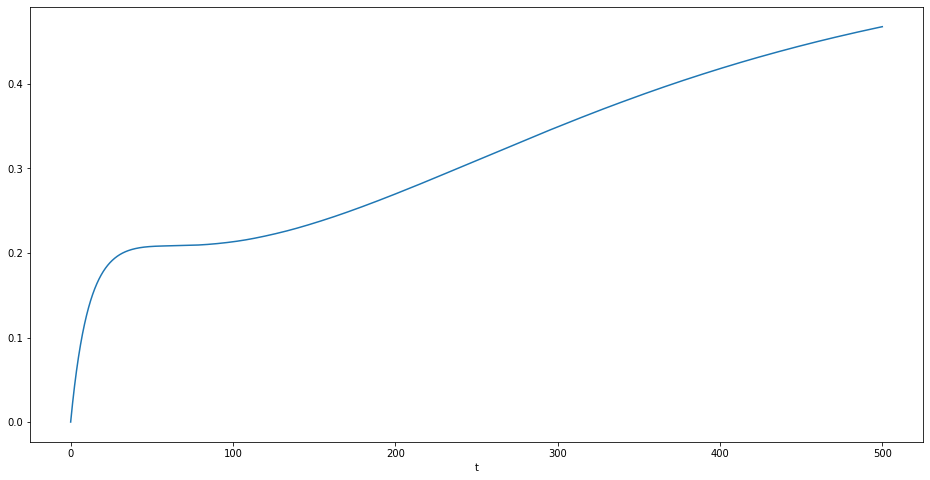

In [50]:
plt.figure(figsize = (16, 8))
t = np.linspace(0, nlen, 20*nlen)
z_full = sol_full.sol(t)
plt.plot(t, z_full[-1].T)
plt.xlabel('t')
plt.show()

In [31]:
sol_full

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 428
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x11a787640>
   status: 0
  success: True
        t: array([0.00000000e+00, 6.08841415e-02, 5.47901712e-01, 2.25026526e+00,
       4.56415308e+00, 6.97261594e+00, 9.43625254e+00, 1.19264205e+01,
       1.44497012e+01, 1.70490689e+01, 1.98335862e+01, 2.30054014e+01,
       2.68542278e+01, 3.17870476e+01, 3.84385502e+01, 4.74659694e+01,
       5.53304443e+01, 6.31949192e+01, 7.11032990e+01, 7.87865674e+01,
       8.62928089e+01, 9.39274360e+01, 1.01903628e+02, 1.10077955e+02,
       1.18092827e+02, 1.25817036e+02, 1.33503396e+02, 1.41494664e+02,
       1.49827925e+02, 1.58155113e+02, 1.66154561e+02, 1.73931043e+02,
       1.81885263e+02, 1.90260991e+02, 1.98837643e+02, 2.07158527e+02,
       2.15101959e+02, 2.23021423e+02, 2.31337240e+02, 2.40053374e+02,
       2.48701031e+02, 2.56904250e+02, 2.64847073e+0